In [36]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Read the processed dataset

In [37]:
# Read the crime data
df = pd.read_csv("processed_dataset.csv")
df.head()

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL


## Add Target column for classification

Classify the crime rate as either `High` or `Low` based on the number of Violent Crime per Population.

Crime rate is `High` if the rate is larger than the national median and vice versa.

In [38]:
df_new = df.drop(['Log_NumInShelters', 'Log_NumStreet', 'Log_murders', 'Log_murdPerPop', 'State', 'Log_nonViolPerPop'], axis=1)
df_new.dropna(inplace=True)

In [39]:
def high_or_low(rate):
    median_rate = df_new['Log_ViolentCrimesPerPop'].median()
    if rate<median_rate: 
        return 0
    else: 
        return 1

In [40]:
df_new['isViolentCrimePerPopHigh'] = df_new['Log_ViolentCrimesPerPop'].apply(high_or_low)

In [41]:
df_new

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglaries,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,isViolentCrimePerPopHigh
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,2.256699,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,1
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.706527,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.701692,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,0
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.623161,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,1
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,-0.099189,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,-1.436723,-2.100658,-0.767483,-0.855929,-0.706228,-0.527513,1.455122,-0.643885,-0.570320,1.974283,...,0.769471,0.430378,1.195098,1.060460,1.056291,0.756143,0.449139,-0.058941,1.116249,1
1588,0.554841,1.268870,-0.566612,-0.687122,0.916683,0.178024,-0.911653,0.078186,-0.096613,-0.401085,...,-0.745365,-0.340897,-1.005855,-0.646983,-0.668912,0.073945,-1.266200,-1.154135,-0.308101,0
1589,0.118178,1.698822,-0.393572,-0.534317,-1.587601,-0.714485,-0.542659,0.935667,-0.681928,-0.030955,...,0.155411,0.561964,-0.928590,-1.031806,0.085088,0.874690,-0.732181,-0.704035,0.658741,1
1591,-1.313636,0.941352,-0.846709,-0.945629,-1.162882,-0.539840,-1.043026,0.072626,-0.243226,1.654693,...,0.176320,0.251005,-0.730440,-1.264087,0.066208,0.146189,-0.482484,-0.738659,-0.054134,0


## Train-Test Split

Assign the features to `X` and the target to `y`.

In [42]:
X = df_new.drop(['isViolentCrimePerPopHigh','Log_ViolentCrimesPerPop'], axis=1)
y = df_new['isViolentCrimePerPopHigh']

Create a training set containing a random sample of 80% of the observations, and a test set with the remaining 20%. Set the `random_state` to `424`.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 424)

## Classification using Decision Tree

Set the `criterion` to `entropy`, `max_depth` as `2` and `random_state` to `424`.

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# initialise Decision Tree
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

# train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [47]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[38] <= 0.102\nentropy = 1.0\nsamples = 980\nvalue = [484, 496]'),
 Text(83.7, 108.72, 'X[36] <= -0.564\nentropy = 0.764\nsamples = 464\nvalue = [361, 103]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.431\nsamples = 204\nvalue = [186, 18]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.912\nsamples = 260\nvalue = [175, 85]'),
 Text(251.10000000000002, 108.72, 'X[36] <= 0.975\nentropy = 0.792\nsamples = 516\nvalue = [123, 393]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.945\nsamples = 287\nvalue = [104, 183]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.413\nsamples = 229\nvalue = [19, 210]')]

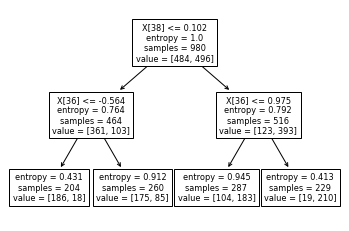

In [48]:
plot_tree(dtree.fit(X_train, y_train))

In [49]:
from sklearn import metrics

In [50]:
y_pred = dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7061224489795919
Precision: 0.7652173913043478
Recall: 0.6616541353383458


In [51]:
print(np.mean(cross_val_score(dtree, X, y, cv=10)))

0.7427962148473944


## Classification using Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.746938775510204
Precision: 0.808695652173913
Recall: 0.6992481203007519


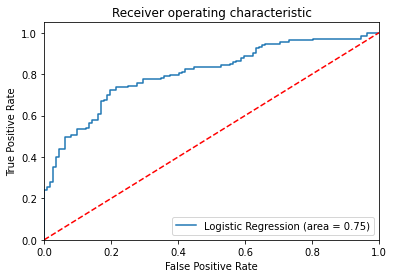

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
print(np.mean(cross_val_score(logreg, X, y, cv=10)))

/Users/ntminh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7118885779021724


## Classification using Perceptron

In [56]:
from sklearn.linear_model import Perceptron
PPT = Perceptron()
PPT.fit(X_train, y_train)

Perceptron()

In [57]:
y_pred = PPT.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6857142857142857
Precision: 0.7692307692307693
Recall: 0.6015037593984962


In [58]:
print(np.mean(cross_val_score(PPT, X, y, cv=10)))

0.6047847527655604


## Classification using SVM

In [59]:
from sklearn import svm

**Linear SVM**

In [60]:
SVM_linear = svm.SVC(kernel='linear')
SVM_linear.fit(X_train, y_train)
y_pred = SVM_linear.predict(X_test)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.746938775510204
Precision: 0.808695652173913
Recall: 0.6992481203007519


In [62]:
print(np.mean(cross_val_score(SVM_linear, X, y, cv=10)))

0.7077702252432361


**Non-Linear SVM**

In [63]:
SVM_rbf = svm.SVC(kernel='rbf')
SVM_rbf.fit(X_train, y_train)
y_pred = SVM_rbf.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7183673469387755
Precision: 0.7962962962962963
Recall: 0.6466165413533834


In [65]:
print(np.mean(cross_val_score(SVM_rbf, X, y, cv=10)))

0.7150739704118353
